<a href="https://colab.research.google.com/github/rugadamanikanta/Airbnb-Booking-analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd
% matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


From below four experiments we can conclude that no of unique **host id**'s are more compare to **host names** and some people may have same name but cant have same id's, we can't consider these names are duplicate but may be a different persons

From above experiments i just filtered only "JOHN" it was result of 294 outcomes, of this 188 different host ids

But from data i just considered John(as first person in list) host Id 2787 as it only having 6 listing on that host id and we can as see 'calculated_host_listings_count' it was showing that host was listed 6 properties.	



In [5]:
df['host_id'].nunique() #expermenting

37457

In [6]:
df['host_name'].nunique() #expirementing

11452

In [7]:
jondf=df[df['host_name']=='John']
len(jondf),jondf['host_id'].nunique()

(294, 188)

In [8]:
jondf[jondf['host_id']==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


**From below outcomes we can conclude that neighbourhood_group created with colabrating group of areas where neighbourhood_group consisted only 5 main area of total data.**

**where as neighbourhood are may be sub areas in neighbourhood_groups. total no of places are listed are 221, from this we mostly have to deal with neighbourhood_group data for best outcomes.**

In [9]:
df['neighbourhood_group'].unique() #experiment

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
df['neighbourhood'].nunique() #expriment

221

**From the following expriments, listing having 0 reviewes in number_of_reviews data in same row last Review and Reviews per month doesn't have any values it was showing NAN, we can can conclude that may be newly listed or does'nt have any occupancy till now.**

**In following second cell we can see after removing data of "0" reviews we doesnt see any non Null values in last Review and Reviews per month data.**

After seperating data i found some interesting thing why these 10052 listing have 0 riviews, 

*   25% of listing kept their avaliablity was 0 day. that mean they just listed but not interested in it. 50% of listing kept their avaliablity was 6 day.
*   25% of listing kept their price above 200$ Due to high cost these listing may have 0 occupency




In [11]:
zero_reviewd_listings=df[df['number_of_reviews']==0]
zero_reviewd_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10052 non-null  int64  
 1   name                            10042 non-null  object 
 2   host_id                         10052 non-null  int64  
 3   host_name                       10047 non-null  object 
 4   neighbourhood_group             10052 non-null  object 
 5   neighbourhood                   10052 non-null  object 
 6   latitude                        10052 non-null  float64
 7   longitude                       10052 non-null  float64
 8   room_type                       10052 non-null  object 
 9   price                           10052 non-null  int64  
 10  minimum_nights                  10052 non-null  int64  
 11  number_of_reviews               10052 non-null  int64  
 12  last_review                     

In [90]:
non_zero_review_listins=df[~(df['number_of_reviews']==0)]
non_zero_review_listins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

In [88]:
zero_reviewd_listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.005200e+04,1.005200e+04,10052.000000,10052.000000,10052.000000,10052.000000,10052.0,0.0,10052.000000,10052.000000
mean,2.257484e+07,8.068437e+07,40.732099,-73.956117,192.919021,11.519797,0.0,NaN,14.793275,104.660466
std,1.135563e+07,8.712593e+07,0.052598,0.043796,358.653017,29.207928,0.0,NaN,50.363637,139.072127
min,3.647000e+03,4.632000e+03,40.499790,-74.242850,0.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,1.208404e+07,1.207519e+07,40.697570,-73.984758,70.000000,1.000000,0.0,NaN,1.000000,0.000000
50%,2.337757e+07,3.979538e+07,40.728870,-73.960175,120.000000,3.000000,0.0,NaN,1.000000,6.000000
75%,3.402092e+07,1.330001e+08,40.763643,-73.939877,200.000000,14.000000,0.0,NaN,2.000000,214.250000
max,3.648724e+07,2.743213e+08,40.911690,-73.716900,10000.000000,1000.000000,0.0,NaN,327.000000,365.000000


In [91]:
non_zero_review_listins.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,1.069370e+07,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720027e+06,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887146e+07,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755482e+07,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**From the following data we seen a listing that have maximum reviews among all given data. interestingly that was located in Queens but not it either Brooklyn and Manhattan.**


In [81]:
max_reviews=df[df['number_of_reviews']==df['number_of_reviews'].max()]
max_reviews

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


**From the following data we seen a listing that have maximum reviews per month among all given data.**

In [82]:
max_reviews_permonth=df[df['reviews_per_month']==df['reviews_per_month'].max()]
max_reviews_permonth

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


In [84]:
max_reviews_permonth['host_id']

42075    244361589
Name: host_id, dtype: int64

In [86]:
tesing=df[df['host_id']==244361589]
tesing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42074,32678718,Luxury accommodation minutes from Central Park!,244361589,Row NYC,Manhattan,Theater District,40.75781,-73.98903,Private room,499,1,0,NaN,NaN,9,293
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
42077,32678721,Nice Room 1 block away from Times Square action!,244361589,Row NYC,Manhattan,Theater District,40.75783,-73.98908,Private room,100,1,38,2019-07-04,14.62,9,295
42078,32678723,Spacious room in the Heart of Midtown!,244361589,Row NYC,Manhattan,Theater District,40.75803,-73.98887,Private room,100,1,6,2019-06-15,2.61,9,289
42079,32678724,Steps from varied cuisines at Restaurant Row!,244361589,Row NYC,Manhattan,Theater District,40.75792,-73.98900,Private room,249,1,0,NaN,NaN,9,278
42080,32678725,Enjoy the Times Square experience with the fam...,244361589,Row NYC,Manhattan,Theater District,40.75976,-73.98761,Private room,249,1,22,2019-06-23,7.59,9,283
42081,32678726,Steps away from the Heart of the Theater Distr...,244361589,Row NYC,Manhattan,Theater District,40.75925,-73.98767,Private room,100,1,1,2019-05-04,0.45,9,299
42082,32678727,In the center of all Broadway Theater ACTION!,244361589,Row NYC,Manhattan,Theater District,40.75821,-73.98820,Private room,249,1,0,NaN,NaN,9,298


**From following experiment i just tried to use location data plot on x and y axies resulted a below output. As data was from NYC with 5 particular areas.**

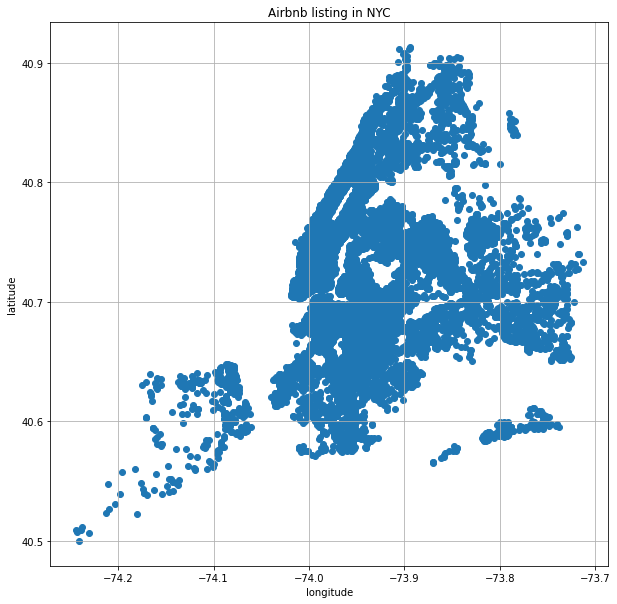

In [99]:
plt.rcParams['figure.figsize'] = (10,10)
plt.grid()
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.title('Airbnb listing in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [13]:
cdf=df.copy() # creating a copy keeping original data safe

From Date i seen there is no use from last Review column, and as it had 10052 non null values. i am droping this column.


In [14]:
cdf.drop(['last_review'], axis=1,inplace=True)

**From following data information in the column of 'name' and 'host_name' very amount data is missing for reviews_per_month column i justified in above only.**

we going fill the missing name and host_name with "NO NAME"

In [80]:
cdf.info() # see we can see in the data last review column was removed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [100]:
cdf['name'].fillna('No Name',inplace=True)
cdf['host_name'].fillna('NO NAME',inplace=True)

In [101]:
cdf.isnull().sum() #checking null values!

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
Host_by_location=cdf.groupby(['neighbourhood_group'])['id'].count()
Host_by_location

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

Most of the listing have been take placed at Brooklyn and Manhattan, in queens listing are mid range, but where as in Bronx and staten island has low listing 

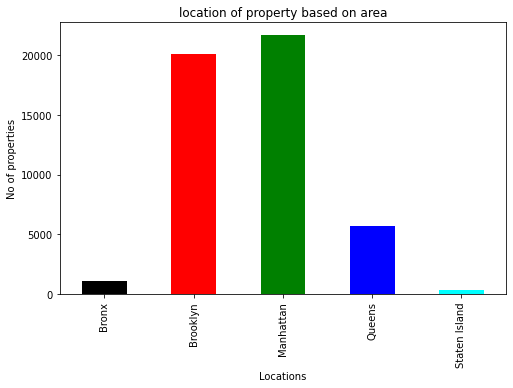

In [109]:
Host_by_location.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

plt.title('location of property based on area')
plt.ylabel('No of properties')
plt.xlabel('Locations')

# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (8, 5)

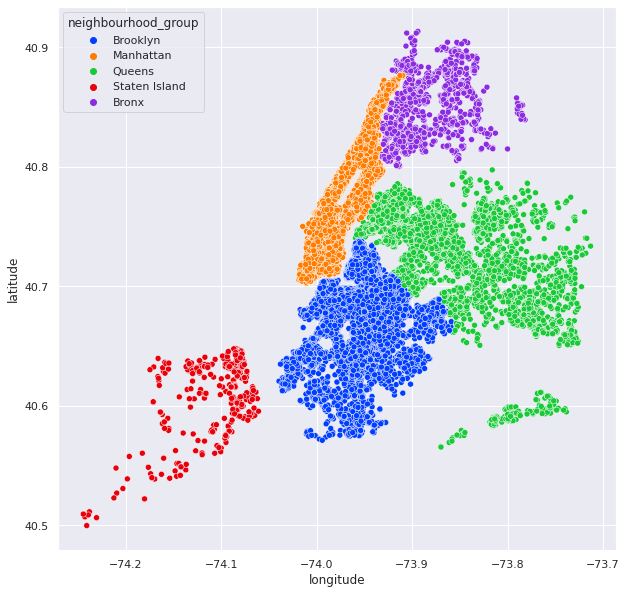

In [126]:
sns.set_theme()
sns.scatterplot(x='longitude', y='latitude',data=cdf, hue='neighbourhood_group',palette='bright')
plt.rcParams['figure.figsize'] = (10,10)

In [32]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [131]:
TypesOfProperty=cdf.groupby(['room_type'])['id'].count()
TypesOfProperty

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: id, dtype: int64

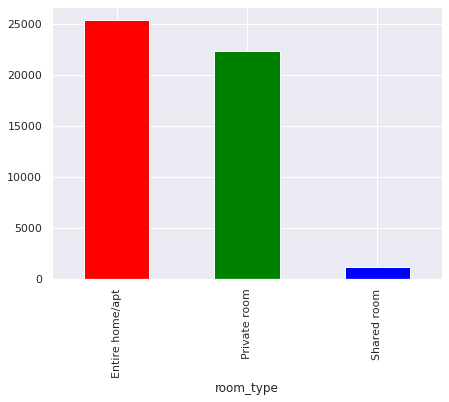

In [130]:
TypesOfProperty.plot(kind='bar',color=[ 'red', 'green', 'blue'])
plt.rcParams['figure.figsize'] = (7, 5)

In [ ]:
df_brooklyn=cdf[cdf['neighbourhood_group']=='Brooklyn'].reset_index()
df_brooklyn

In [ ]:
df_manhattan=cdf[cdf['neighbourhood_group']=='Manhattan'].reset_index()
df_manhattan

In [ ]:
df_queens=cdf[cdf['neighbourhood_group']=='Queens'].reset_index()
df_queens

In [ ]:
df_staisland=cdf[cdf['neighbourhood_group']=='Staten Island'].reset_index()
df_staisland

In [ ]:
df_bronx=cdf[cdf['neighbourhood_group']=='Bronx'].reset_index()
df_bronx

In [22]:
price_of_listings=cdf['price']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


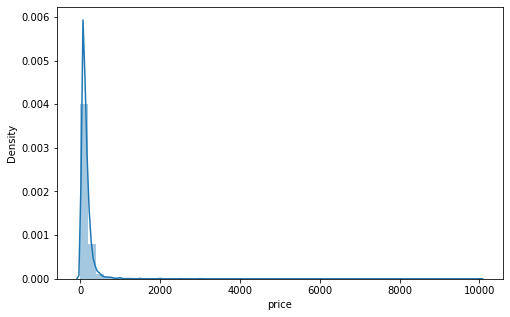

In [23]:
sns.distplot(price_of_listings, hist=True)
plt.rcParams['figure.figsize'] = (15, 5)

In [24]:
Minimum_nights_by_host=df['minimum_nights']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


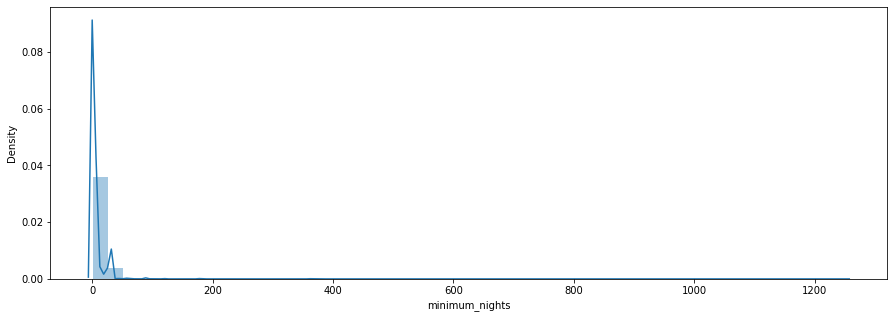

In [25]:
sns.distplot(Minimum_nights_by_host, hist=True)
plt.rcParams['figure.figsize'] = (15, 5)

In [26]:
mulitipul_list_by_host=df['calculated_host_listings_count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


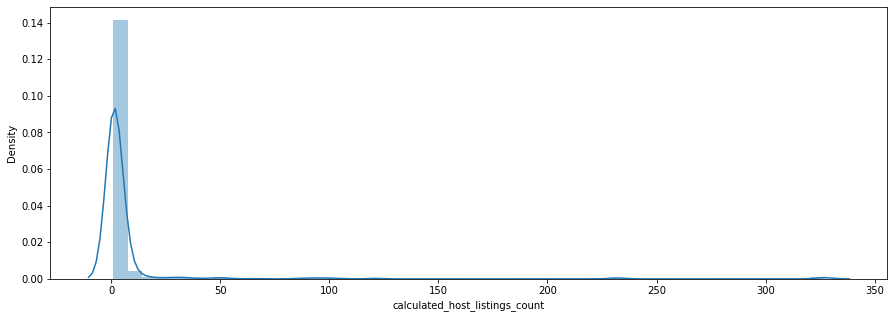

In [27]:
sns.distplot(mulitipul_list_by_host, hist=True)
plt.rcParams['figure.figsize'] = (20, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


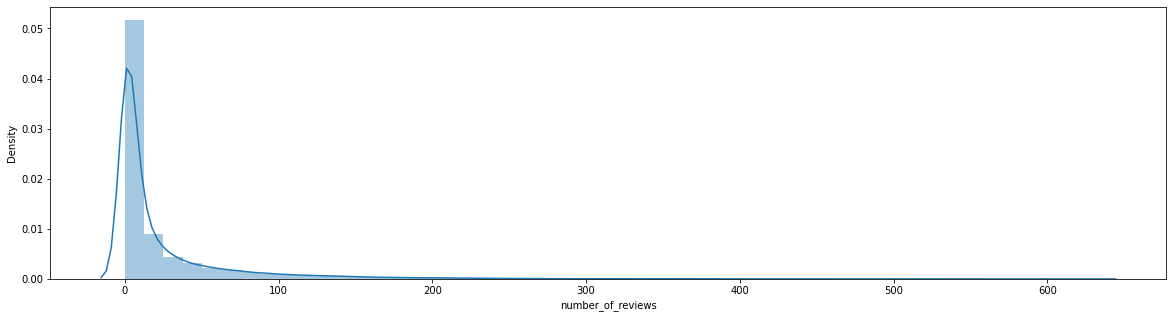

In [28]:
reviews=df['number_of_reviews']
sns.distplot(reviews, hist=True)
plt.rcParams['figure.figsize'] = (20,5)

In [29]:
a=cdf.groupby(['neighbourhood_group','number_of_reviews','price'])['id'].count().unstack()

In [30]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [35]:
property_based_on_location=cdf.groupby(['neighbourhood_group','room_type'])['id'].count().unstack()
property_based_on_location

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


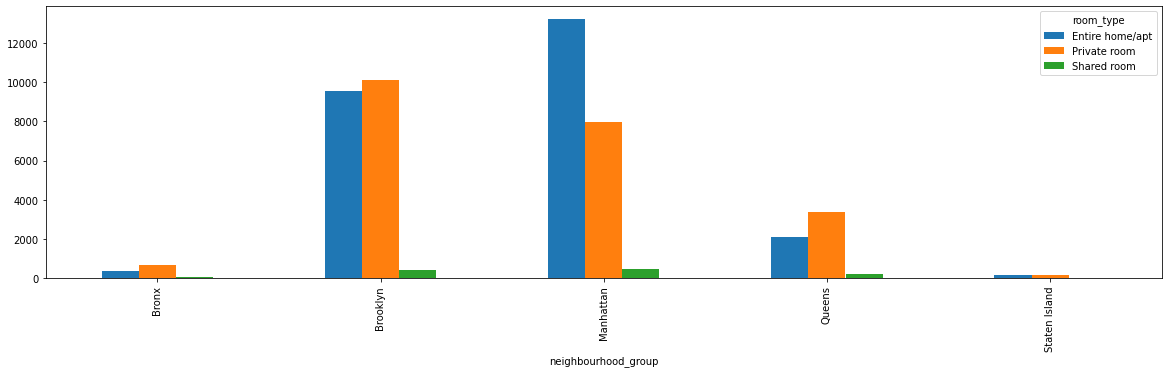

In [36]:
property_based_on_location.plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


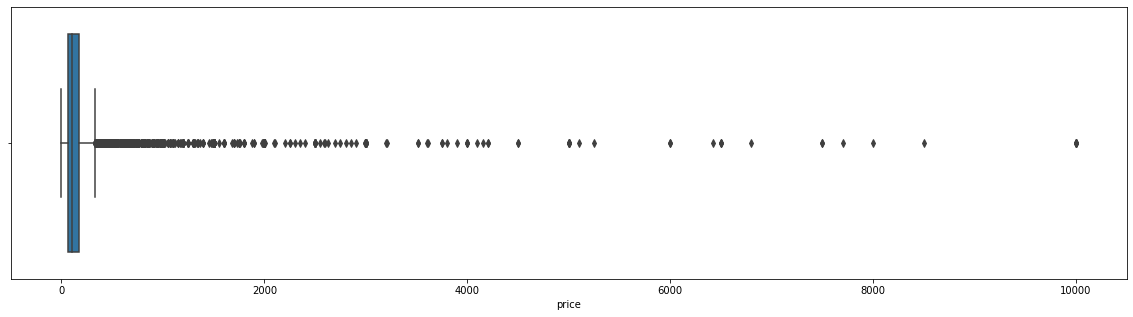

In [37]:
sns.boxplot(cdf['price'])

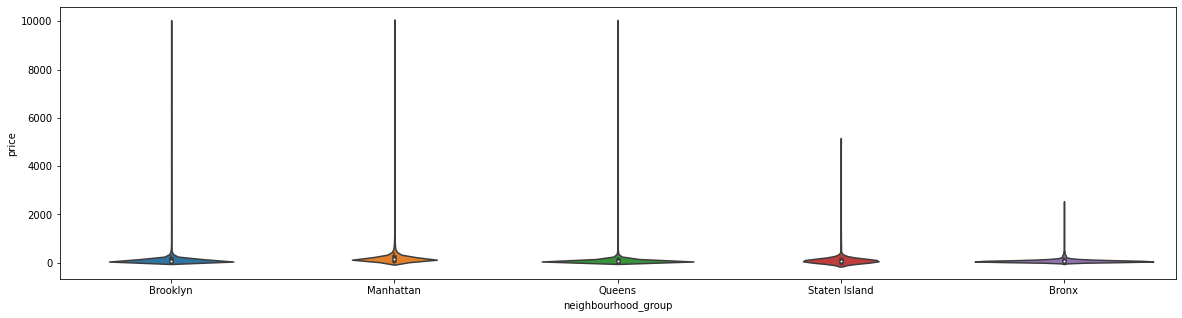

In [38]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=cdf)

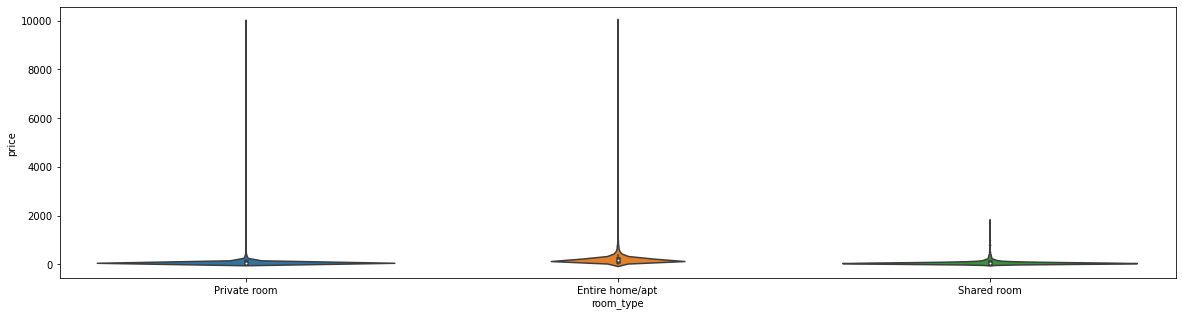

In [39]:
ax= sns.violinplot(x='room_type',y='price',data=cdf)

from all above graph we can see the outliers of price for listings we going to remove the outliers detensection method.

In [40]:
percentile_q1 = np.percentile(cdf['price'],25)
print(percentile_q1)
percentile_q2 = np.percentile(cdf['price'],50)
print(percentile_q2)
percentile_q3 = np.percentile(cdf['price'],75)
print(percentile_q3)

69.0
106.0
175.0


In [41]:
IOQ=percentile_q3-percentile_q1
print(IOQ)
lower_side_outlier=percentile_q1-(1.5)*IOQ
print(lower_side_outlier)
upper_side_outlier=percentile_q3+(1.5)*IOQ
print(upper_side_outlier)

106.0
-90.0
334.0


In [42]:
new_data=cdf[(cdf['price']>lower_side_outlier) & (cdf['price']<upper_side_outlier )]
len(new_data)

45918

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


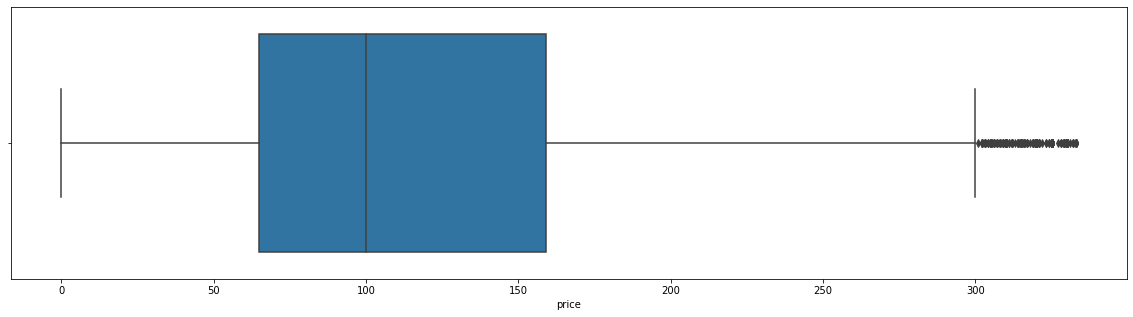

In [43]:
sns.boxplot(new_data['price'])


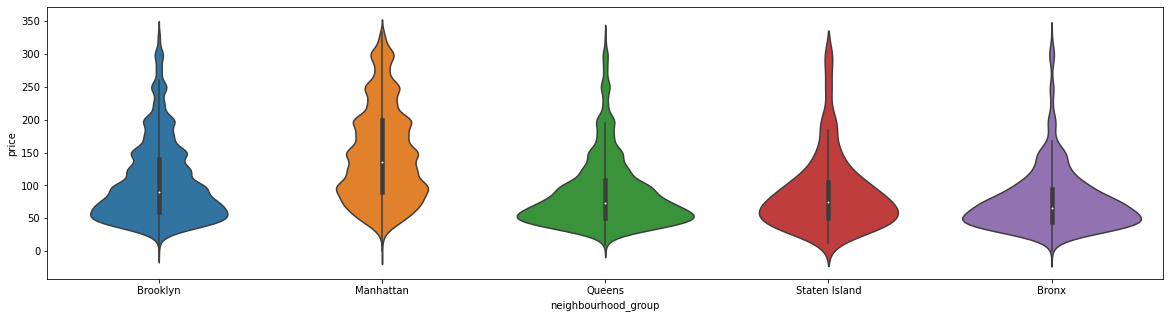

In [44]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=new_data)

In [45]:
Properties_having_reviews_1_to_10=cdf['number_of_reviews'].value_counts()[1:11]

In [46]:
sum(Properties_having_reviews_1_to_10)

20271

In [47]:
sum(cdf['number_of_reviews'].value_counts()[0:11])

30323

There are 30323 properties which having less than 10 reviews only. This is almost 60% of total listing.italicized text

Text(0.5, 0, 'Reviews')

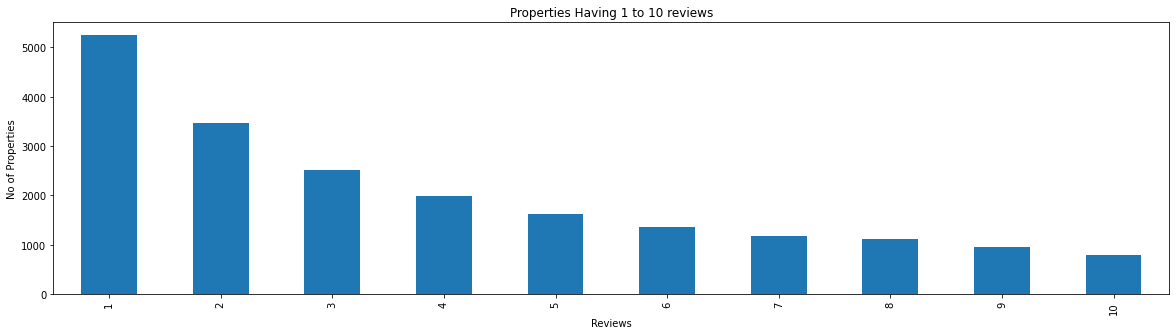

In [48]:
Properties_having_reviews_1_to_10.plot(kind='bar')
plt.title('Properties Having 1 to 10 reviews')
plt.ylabel('No of Properties')
plt.xlabel('Reviews')

In [49]:
a=cdf['number_of_reviews'].sort_values()[-10:]
a

471      480
4870     488
20403    510
1879     540
10623    543
13495    576
2015     594
2030     597
2031     607
11759    629
Name: number_of_reviews, dtype: int64

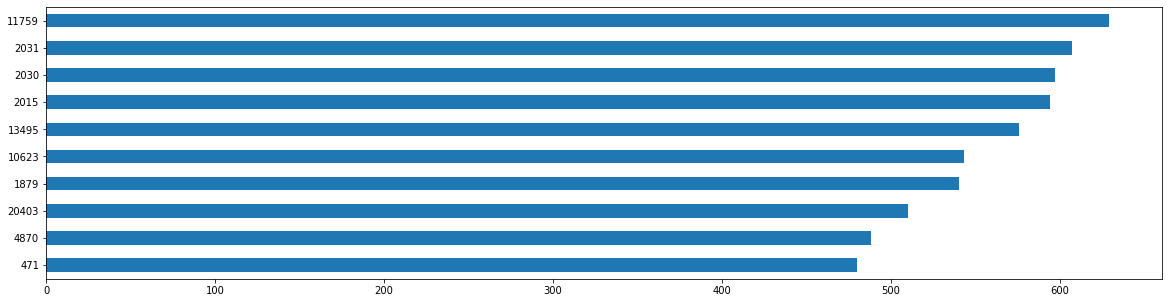

In [50]:
a=cdf['number_of_reviews'].sort_values()[-10:]
a.plot(kind="barh")

In [51]:
cdf['host_id'].nunique()

37457

In [52]:
cdf['host_name'].nunique()

11452

From above two cell we can conform that no of unique host id are not equal to host name. we can conform that some host name are common. 

In [53]:
Host_having_multipul_property_listing=cdf['host_id'].value_counts()[:20]

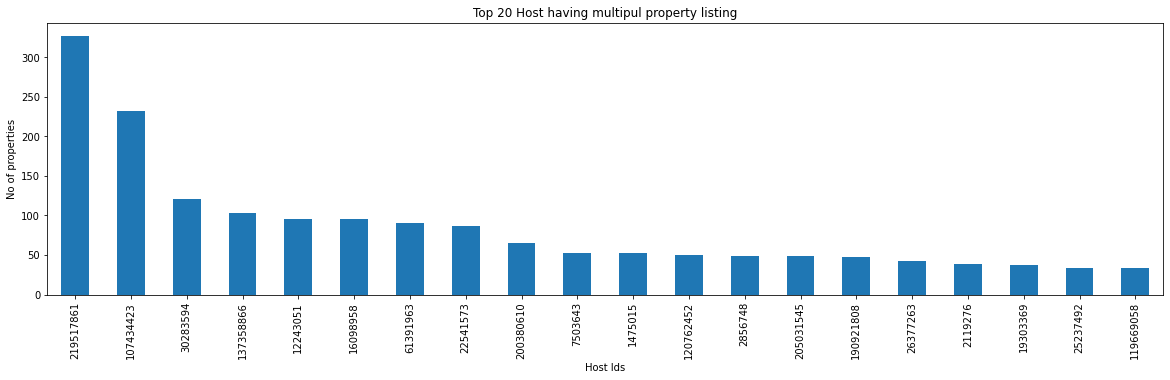

In [54]:
Host_having_multipul_property_listing.plot(kind='bar')
plt.title('Top 20 Host having multipul property listing')
plt.ylabel('No of properties')
plt.xlabel('Host Ids')

# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (12, 5)

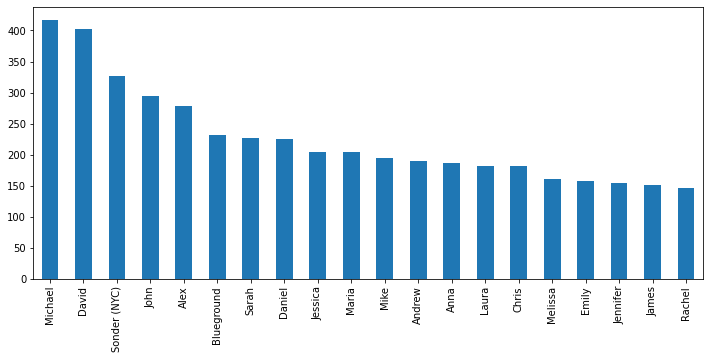

In [55]:
a=cdf['host_name'].value_counts()[:20]
a.plot(kind='bar')

In [56]:
df_privateRoom=cdf[cdf['room_type']=='Private room'].reset_index()
df_privateRoom

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
2,6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
3,7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
4,8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22321,48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,1,31
22322,48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,2,163
22323,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
22324,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36


In [57]:
df_privateRoom.describe()

,index,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22326.000000,2.232600e+04,2.232600e+04,22326.000000,22326.000000,22326.000000,22326.000000,22326.000000,17665.000000,22326.000000,22326.000000
mean,24988.587297,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
std,13682.863564,1.064436e+07,7.905584e+07,0.058214,0.048025,160.205262,16.292091,47.286746,1.814011,10.218641,132.092065
min,0.000000,2.539000e+03,2.787000e+03,40.499790,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,13511.000000,1.010887e+07,1.013512e+07,40.689270,-73.969890,50.000000,1.000000,1.000000,0.200000,1.000000,0.000000
50%,25156.500000,2.015303e+07,3.721976e+07,40.717765,-73.948105,70.000000,2.000000,5.000000,0.770000,1.000000,45.000000
75%,36582.750000,2.908201e+07,1.204167e+08,40.764657,-73.925185,95.000000,4.000000,25.000000,2.090000,2.000000,214.000000
max,48894.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,999.000000,629.000000,58.500000,327.000000,365.000000


In [58]:
Maximum_price_PrivateRoom=df_privateRoom['price'].max()
Minimum_price_privateRoom=df_privateRoom[df_privateRoom['price']==0]
# Maximum_price_PrivateRoom, 
Minimum_price_privateRoom

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
10184,23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
11297,25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
11402,25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
11458,25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
11478,25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
11479,25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
11480,25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222


In [59]:
df_EntireHome=cdf[cdf['room_type']=='Entire home/apt'].reset_index()
df_EntireHome

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
2,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
3,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
4,9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25404,48879,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,NaN,1,22
25405,48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,3,365
25406,48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,1,176
25407,48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,3,365


In [60]:
df_EntireHome[df_EntireHome['price']==0]

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
13889,25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
14107,26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,1,0


In [61]:
df_SharedRoom=cdf[cdf['room_type']=='Shared room'].reset_index()
df_SharedRoom

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,1.81,4,188
1,203,54453,MIDTOWN WEST - Large alcove studio,255583,Anka,Manhattan,Hell's Kitchen,40.76548,-73.98474,Shared room,105,6,10,0.09,1,363
2,357,99070,Comfortable Cozy Space in El Barrio,522065,Liz And Melissa,Manhattan,East Harlem,40.79406,-73.94102,Shared room,65,7,131,1.31,2,0
3,492,173072,Cozy Pre-War Harlem Apartment,826192,Lewis,Manhattan,Harlem,40.80827,-73.95329,Shared room,49,3,168,4.60,1,248
4,545,200645,Best Manhattan Studio Deal!,933378,Edo,Manhattan,Upper East Side,40.76739,-73.95570,Shared room,90,1,0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,3,363
1156,48855,36456829,Perfectly Located Organic Getaway,6677425,Isabel,Manhattan,Upper West Side,40.79753,-73.96155,Shared room,55,2,0,NaN,2,49
1157,48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,6,338
1158,48868,36473253,Heaven for you(only for guy),261338177,Diana,Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,NaN,6,365


In [62]:
existing_list_data=df[~(df['number_of_reviews']==0)].reset_index()
existing_list_data

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38838,48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
38839,48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
38840,48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
38841,48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [63]:
data=existing_list_data.groupby(['neighbourhood_group','room_type'])['id'].count().unstack()

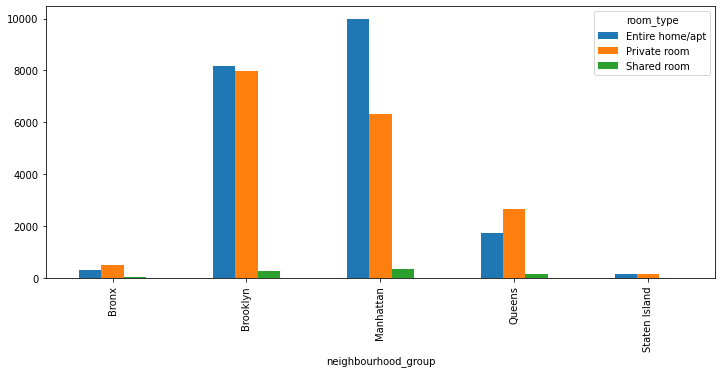

In [64]:
data.plot(kind='bar')

In [65]:
existing_list_data[existing_list_data['reviews_per_month']==existing_list_data['reviews_per_month'].max()]

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
35003,42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


In [66]:
existing_list_data[existing_list_data['number_of_reviews']==existing_list_data['number_of_reviews'].min()]

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
92,97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
138,143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
222,229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,2012-09-17,0.01,5,365
230,237,60673,Private Room/bath Luxurious Harlem,249372,Cynthia,Manhattan,Harlem,40.81583,-73.94707,Private room,175,2,1,2018-10-07,0.11,1,365
262,272,64707,Amazing Sunny & Breezy Home In the Heart of NYC,7310,Tilly,Manhattan,Little Italy,40.71702,-73.99811,Entire home/apt,90,14,1,2019-01-02,0.16,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38837,48740,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230
38838,48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
38839,48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
38840,48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87


In [67]:
existing_list_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38843 entries, 0 to 38842
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           38843 non-null  int64  
 1   id                              38843 non-null  int64  
 2   name                            38837 non-null  object 
 3   host_id                         38843 non-null  int64  
 4   host_name                       38827 non-null  object 
 5   neighbourhood_group             38843 non-null  object 
 6   neighbourhood                   38843 non-null  object 
 7   latitude                        38843 non-null  float64
 8   longitude                       38843 non-null  float64
 9   room_type                       38843 non-null  object 
 10  price                           38843 non-null  int64  
 11  minimum_nights                  38843 non-null  int64  
 12  number_of_reviews               

In [68]:
higest_listing=df[df['calculated_host_listings_count']==df['calculated_host_listings_count'].max()]
higest_listing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


In [69]:
higest_listing['room_type'].unique()

array(['Entire home/apt', 'Private room'], dtype=object)

In [70]:
higest_listing['price'].max()

699

In [71]:
higest_listing['price'].min()

100

In [72]:
df.groupby(['neighbourhood_group','room_type'])['id'].count().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [73]:
jondf=df[df['host_name']=='John']
jondf[jondf['host_id']==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


In [74]:
cdf.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

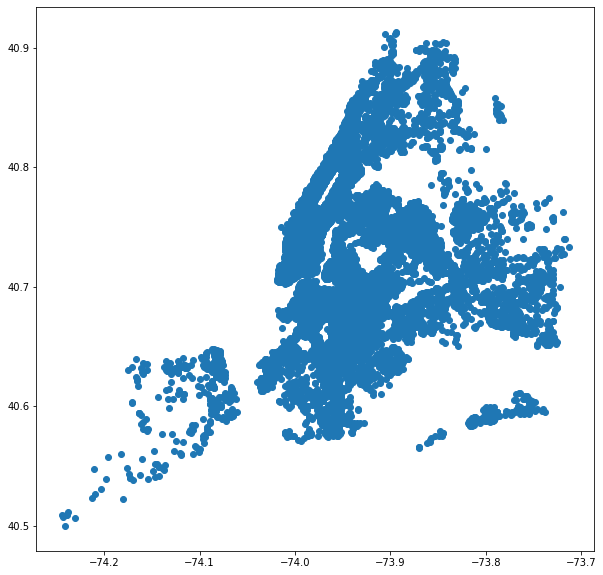

In [76]:
Types_of_rooms=cdf.value_counts('room_type')
Types_of_rooms

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

In [77]:
room_avaliablity=cdf.groupby(['room_type','minimum_nights']).count().unstack()
room_avaliablity

id                          ... availability_365               
minimum_nights     1       2       3       4     ...             500  999  1000 1250
room_type                                        ...                                
Entire home/apt  4227.0  6236.0  4728.0  2122.0  ...              3.0  1.0  1.0  1.0
Private room     7887.0  5267.0  3186.0  1144.0  ...              2.0  1.0  NaN  NaN
Shared room       606.0   193.0    85.0    37.0  ...              NaN  1.0  NaN  NaN

[3 rows x 1417 columns]

In [78]:
room=cdf.groupby(['minimum_nights','availability_365']).count().unstack()
room

id                      ... calculated_host_listings_count                    
availability_365     0      1     2      3    ...                            362   363    364    365
minimum_nights                                ...                                                   
1                 4976.0   94.0  58.0   38.0  ...                           71.0  94.0  152.0  422.0
2                 3982.0  103.0  98.0  106.0  ...                           30.0  50.0   74.0  184.0
3                 2966.0   70.0  46.0   76.0  ...                           21.0  32.0   47.0  137.0
4                 1344.0   32.0  19.0   27.0  ...                            5.0   5.0   16.0   41.0
5                 1410.0   29.0  15.0   15.0  ...                            4.0  10.0   15.0   38.0
...                  ...    ...   ...    ...  ...                            ...   ...    ...    ...
480                  NaN    NaN   NaN    NaN  ...                            NaN   NaN    NaN    1.0
500                  NaN    NaN   NaN    NaN  ...                            1.0   NaN    NaN    1.0
999                  NaN    NaN   NaN    NaN  ...                            NaN   NaN    NaN    1.0
1000                 NaN    NaN   NaN    NaN  ...                            1.0   NaN    NaN    NaN
1250                 NaN    NaN   NaN    NaN  ...                            NaN   NaN    NaN    1.0

[109 rows x 4758 columns]

In [79]:
room_rer=adf.groupby(['minimum_nights','number_of_reviews']).count().unstack()
room_rer

NameError: ignored

In [ ]:
room_avaliablity.plot()

plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (10, 5)